## Importing packages

In [1]:
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

/home/timhug/.cache/pypoetry/virtualenvs/airline-passenger-satisfaction-sjwmpR15-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: /home/timhug/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [3]:
import pandas as pd

# Path to the extracted dataset
file_path = '/home/timhug/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1/train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data type conversions

In [4]:
df.info()

# From this output we can see that data type conversions are necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# Specify categorical and numerical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 
                     'Departure/Arrival time convenient', 'Ease of Online booking', 
                     'Gate location', 'Food and drink', 'Online boarding', 
                     'Seat comfort', 'Inflight entertainment', 'On-board service', 
                     'Leg room service', 'Baggage handling', 'Checkin service', 
                     'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 
                     'Arrival Delay in Minutes']

# Convert data types
df[categorical_columns] = df[categorical_columns].astype('category')  # Convert to categorical
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)    # Ensure numerical data type

# Verify the conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  int64   
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  int64   
 8   Inflight wifi service              103904 non-null  int64   
 9   Departure/Arrival time convenient  103904 non-null  int64   
 10  Ease of Online booking             103904 non-null  int64   
 11  Gate location             

##### Note: 
The following columns represent passenger satisfaction levels for particular aspects of their journey from 1 being worst to 5 being best.
So essentially, the possible values of 1-5 represent categories. However, the decision has been made to not encode these columns as categorical, as these are ordinal categories. By encoding these columns as integers, it is possible to compute averages and other summary statisitcs in a meaningful way, unlike with non-ordinal categorical columns.


* "Inflight wifi service"
* "Departure/Arrival time convenient"
* "Ease of Online booking",
* "Gate location"
* "Food and drink"
* "Online boarding"
* "Seat comfort" 
* "Inflight entertainment"
* "On-board service"
* "Leg room service"
* "Baggage handling"
* "Check-in service"
* "Inflight service"
* "Cleanliness"

## EDA

In [6]:
df.shape

(103904, 25)

#### EDA: Missing values

In [7]:
# Finding columns with missing values and their counts
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

missing_df = pd.DataFrame({
    "column": missing_columns.index,
    "n_missing": missing_columns.values
})
missing_df

,column,n_missing
0,Arrival Delay in Minutes,310


#### EDA: Categorical Variables (Univariate Analysis)

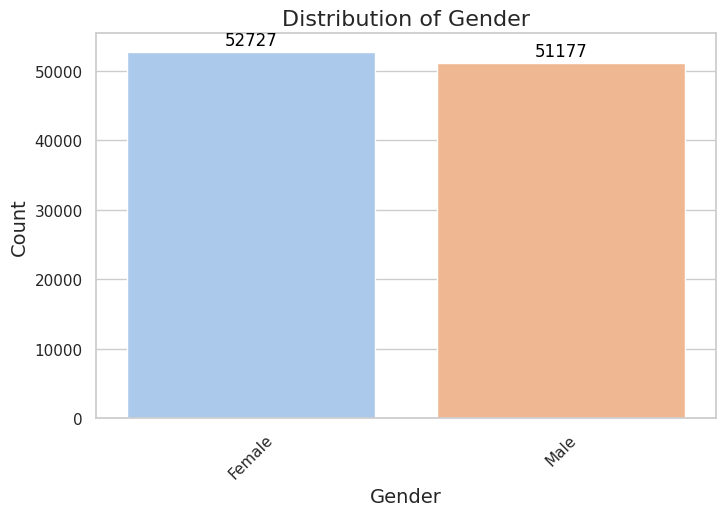

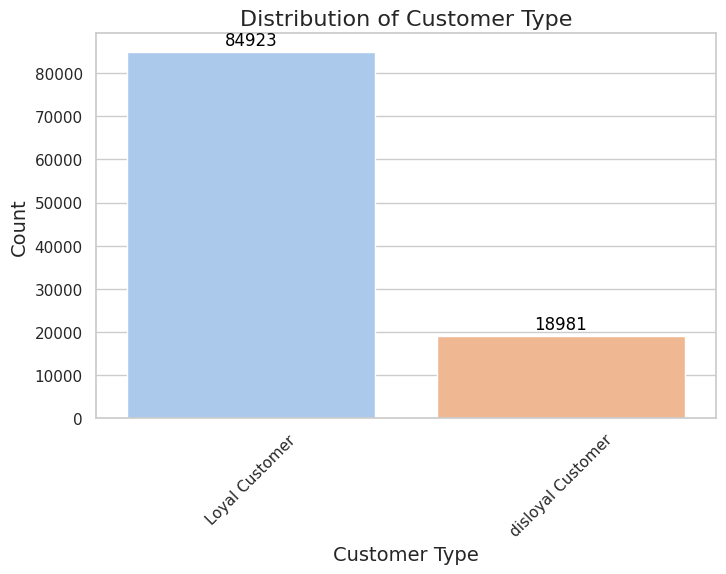

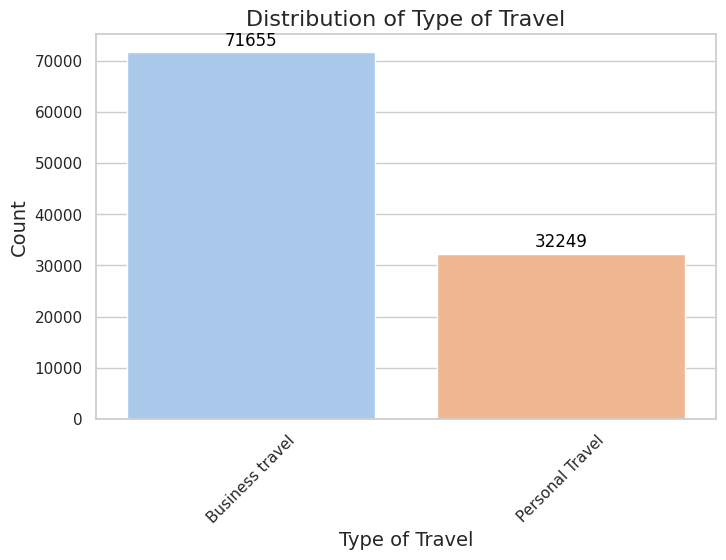

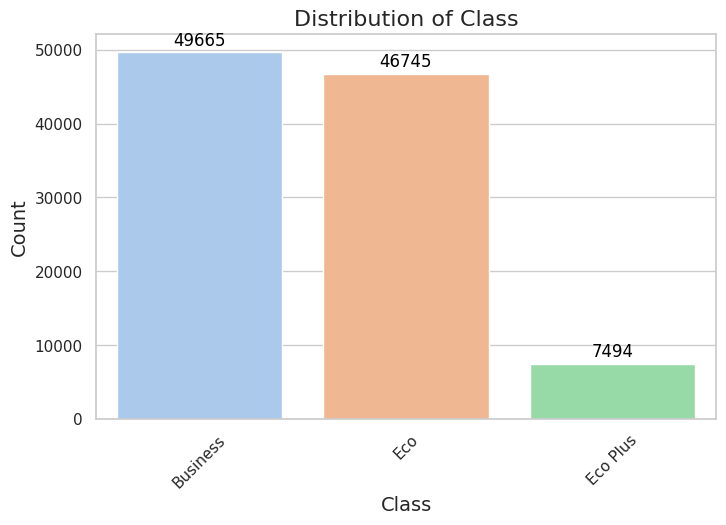

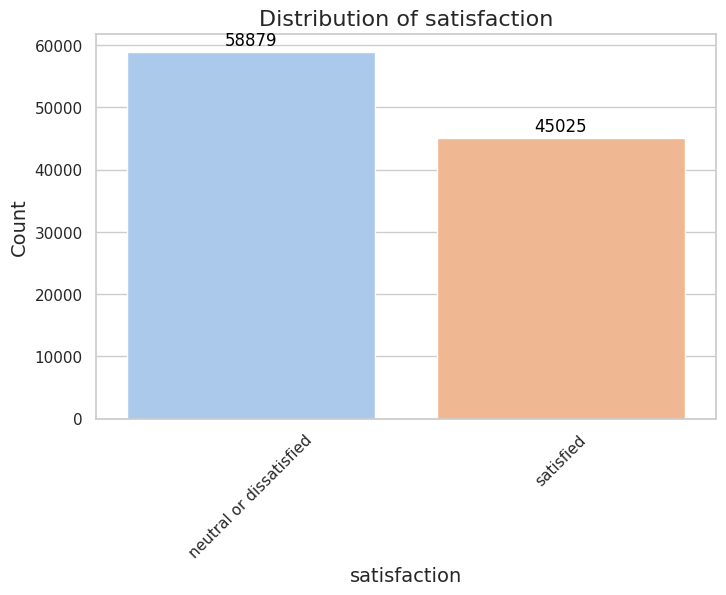

In [8]:
# Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Set plot style
sns.set(style="whitegrid")

# Create barplots
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue=col, dodge=False, palette="pastel", legend=False)
    
    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='baseline',
            fontsize=12, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    # Set titles and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

In [9]:
# Calculate percentage for each category
category_percentages = df['satisfaction'].value_counts(normalize=True) * 100

# Display the result
print("Percentage of observations for each category in 'satisfaction':")
print(category_percentages)

# The target column is weakly imbalanced. This should be taken into consideration for the train test splits, in the modeling step. 

Percentage of observations for each category in 'satisfaction':
satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


#### EDA: Categorical Variables (Bivariate Analysis, vs target)

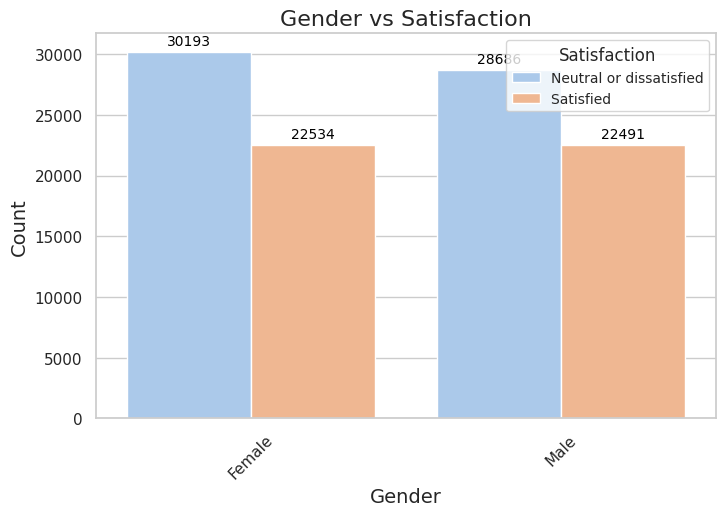

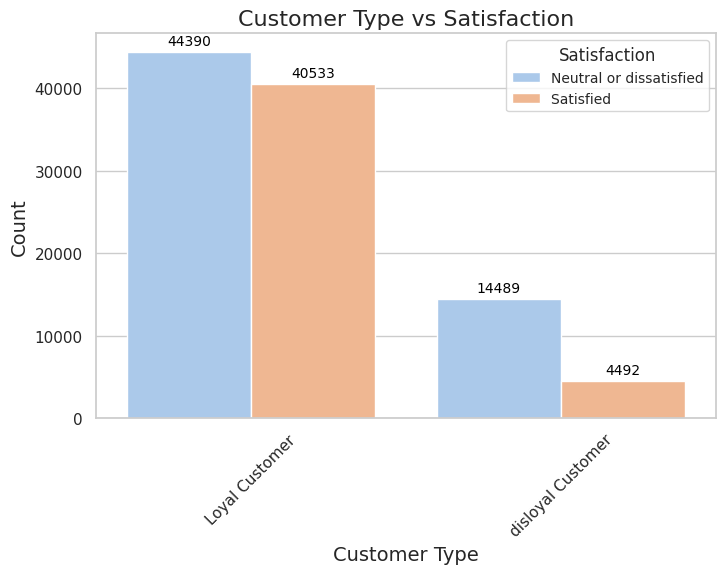

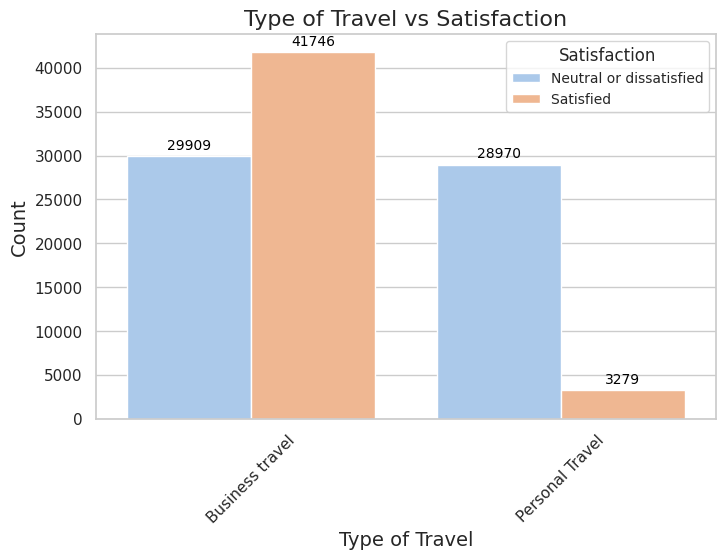

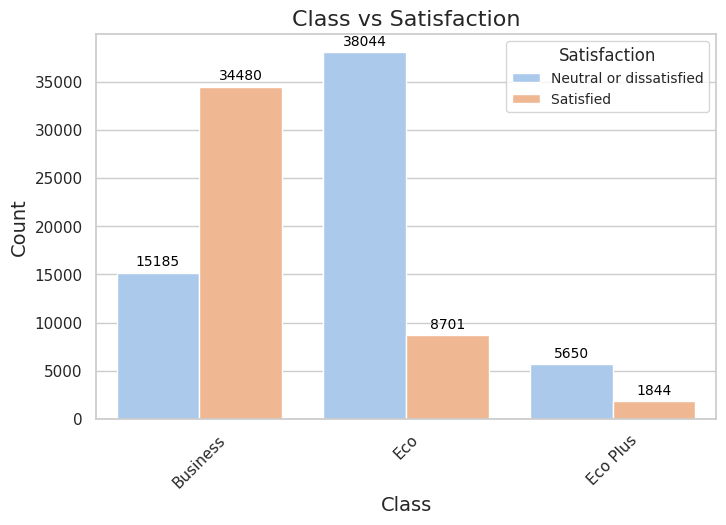

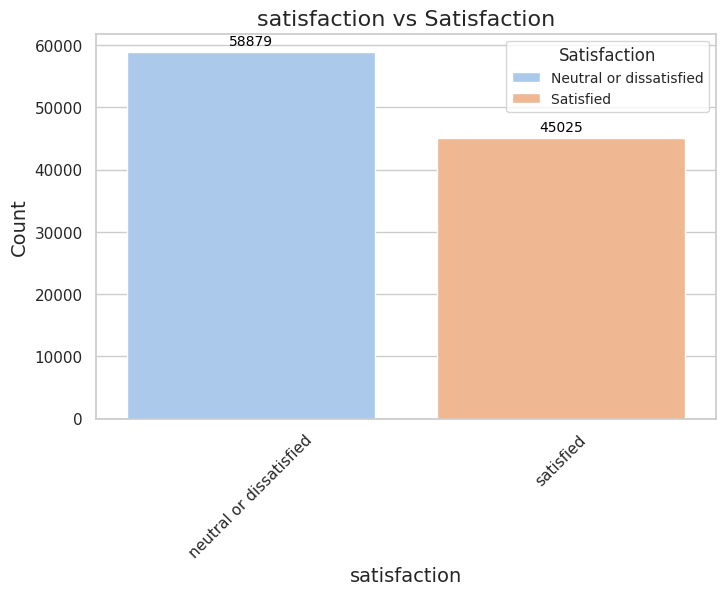

In [10]:

# List of categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create plots for each categorical variable against target (satisfaction column)
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue='satisfaction', palette="pastel")
    
    # Add counts on top of the bars
    for p in ax.patches:
        # Get the height (count) of the bar
        count = int(p.get_height())
        
        # Only annotate if count is greater than 0
        if count > 0:
            ax.annotate(
                f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='baseline',
                fontsize=10, 
                color='black', 
                xytext=(0, 5), 
                textcoords='offset points'
            )
    
    # Customize plot
    plt.title(f'{col} vs Satisfaction', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Satisfaction', labels=['Neutral or dissatisfied', 'Satisfied '], fontsize=10)
    plt.xticks(rotation=45)
    plt.show()

#### EDA: Numerical Variables

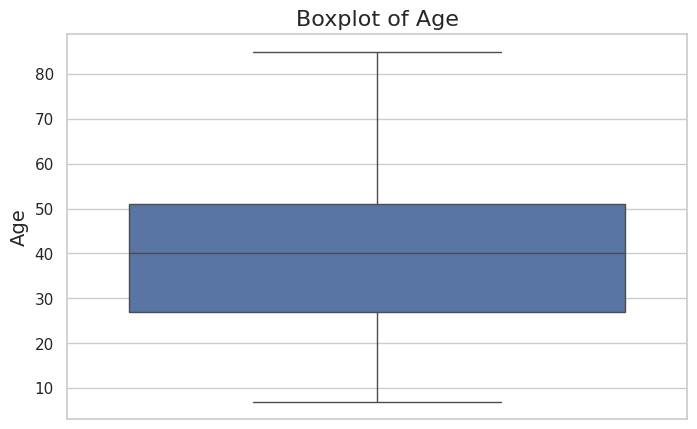

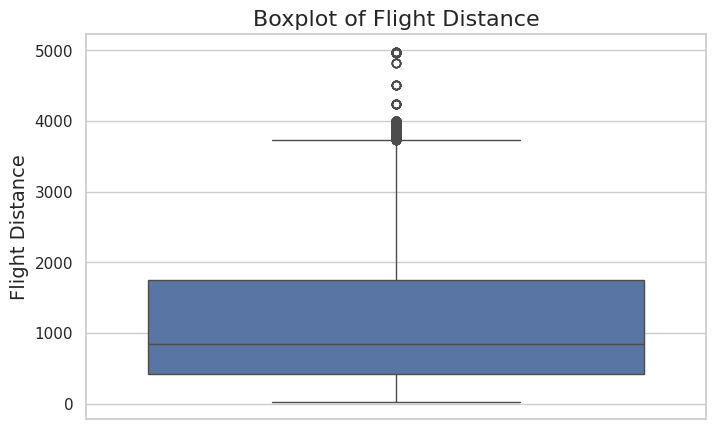

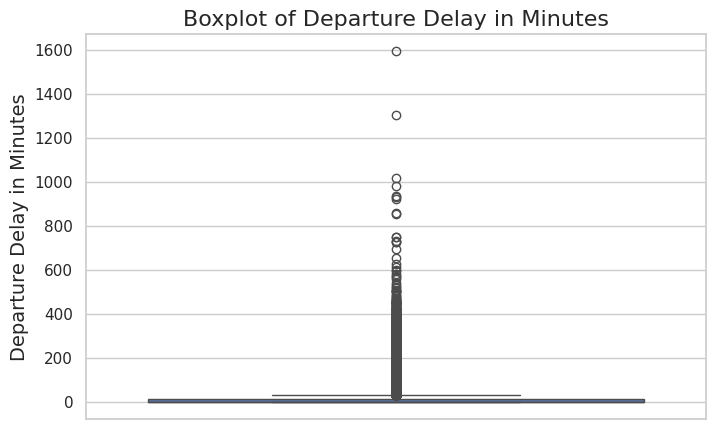

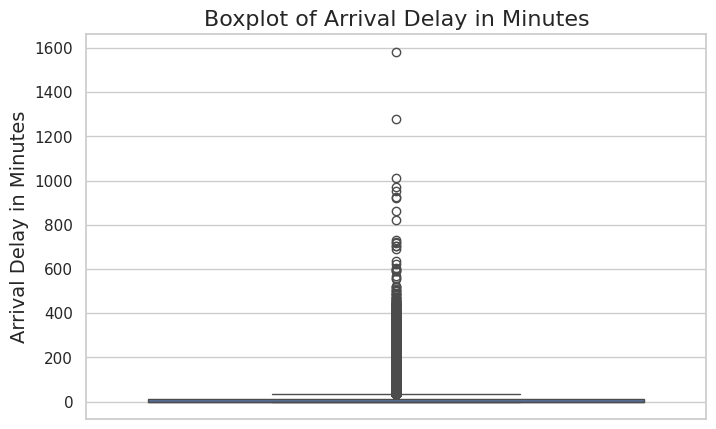

In [11]:
# Univariate analysis for numerical variables: Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# List of columns to exclude
exclude_columns = [
    "id",
    "Unnamed: 0",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Filter columns by excluding the specified ones
filtered_columns = [col for col in numerical_columns if col not in exclude_columns]

# Create boxplots
for col in filtered_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    
    # Set titles and labels
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('')
    plt.show()


/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


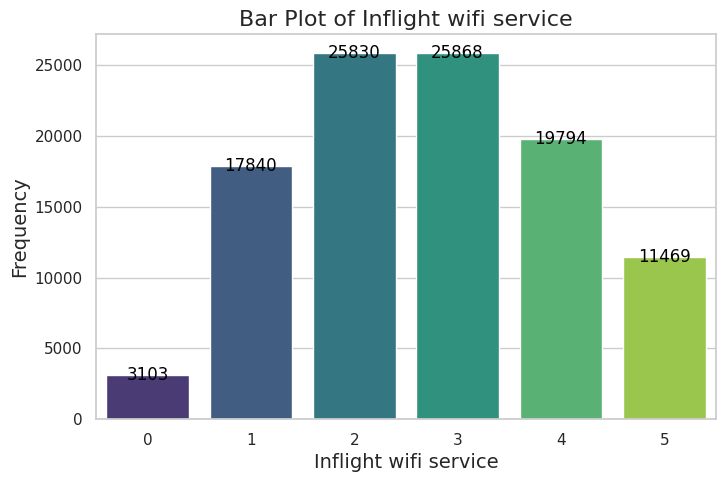

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


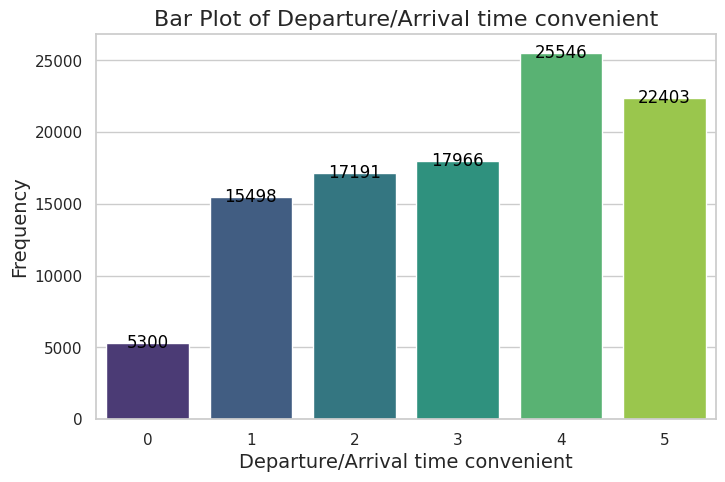

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


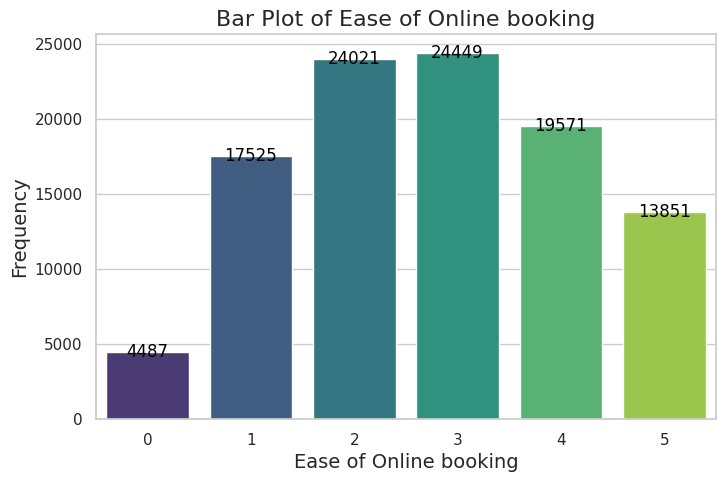

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


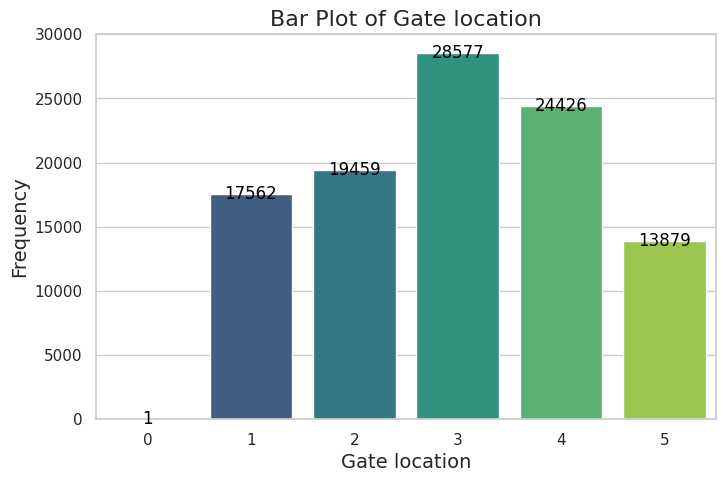

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


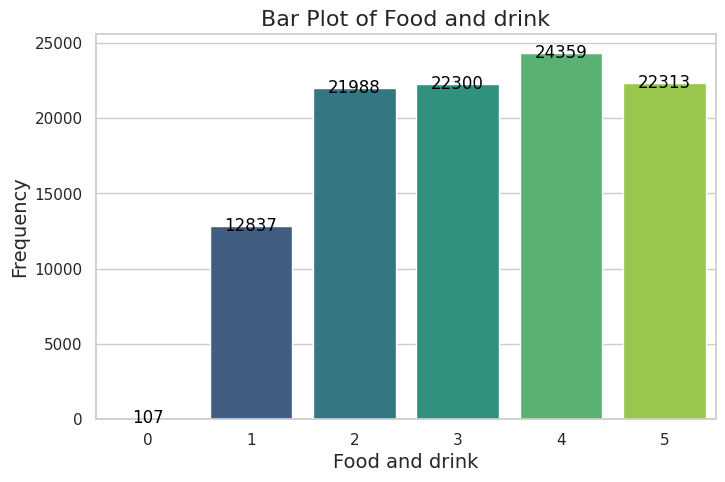

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


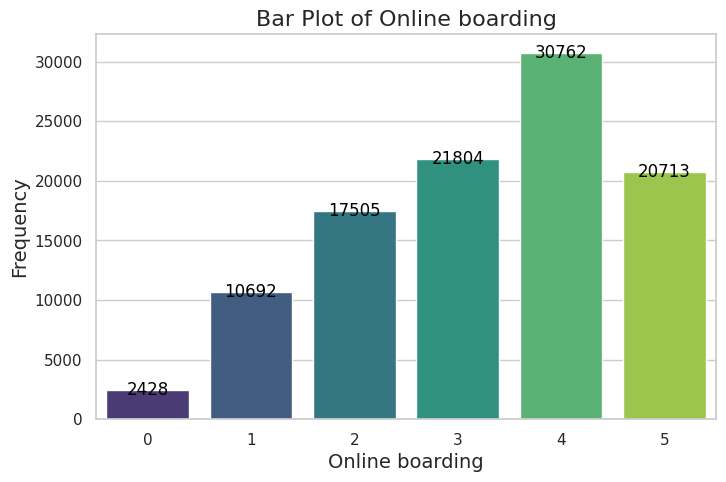

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


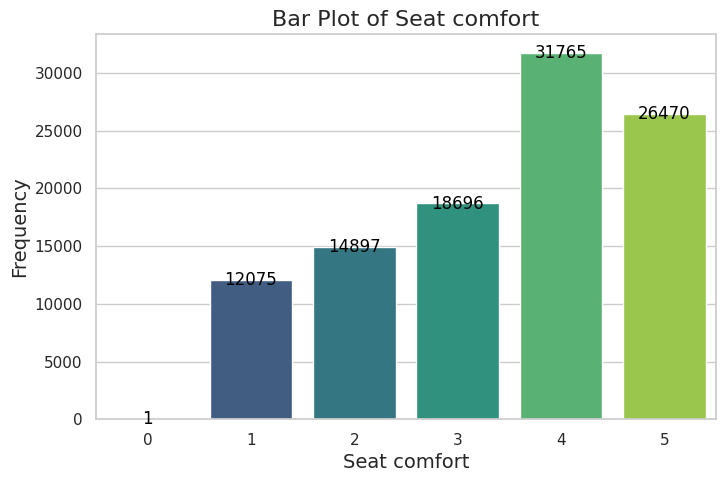

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


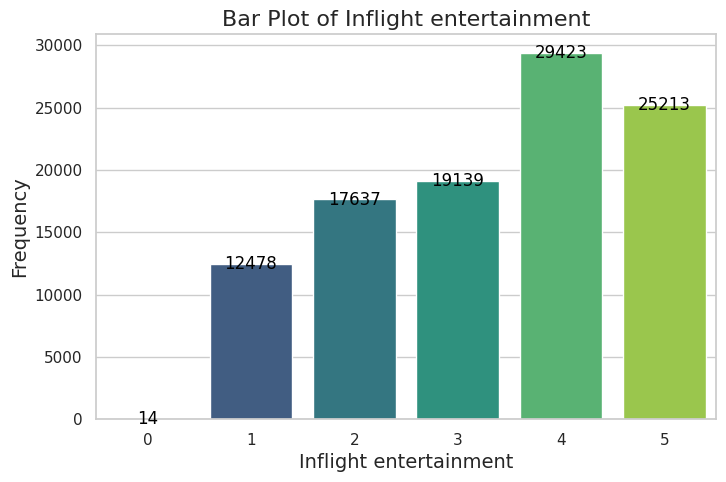

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


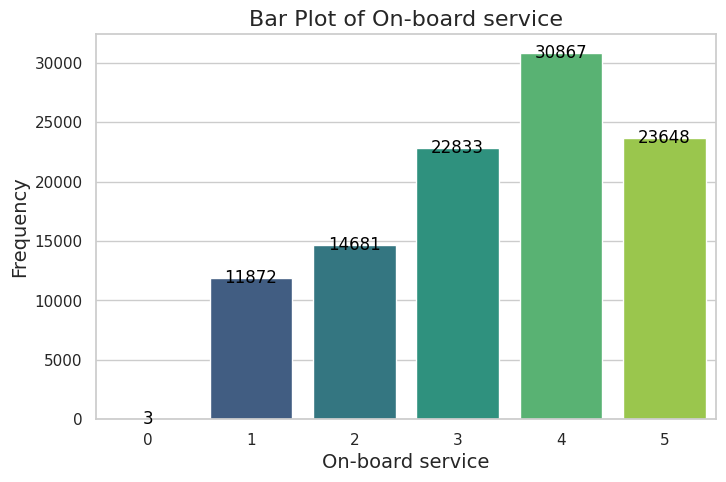

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


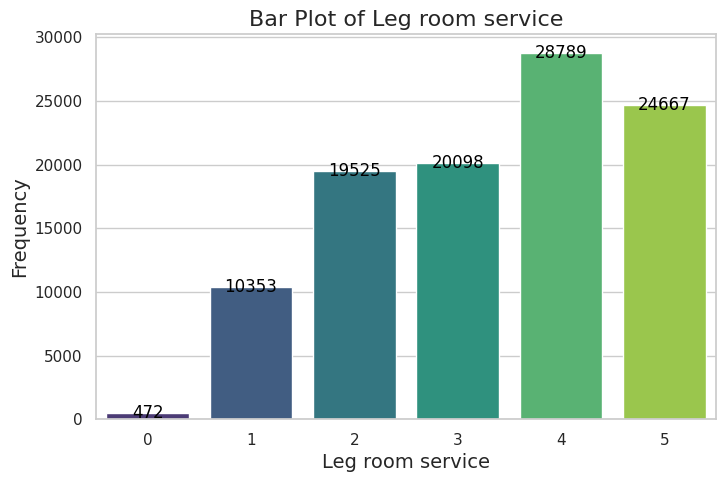

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


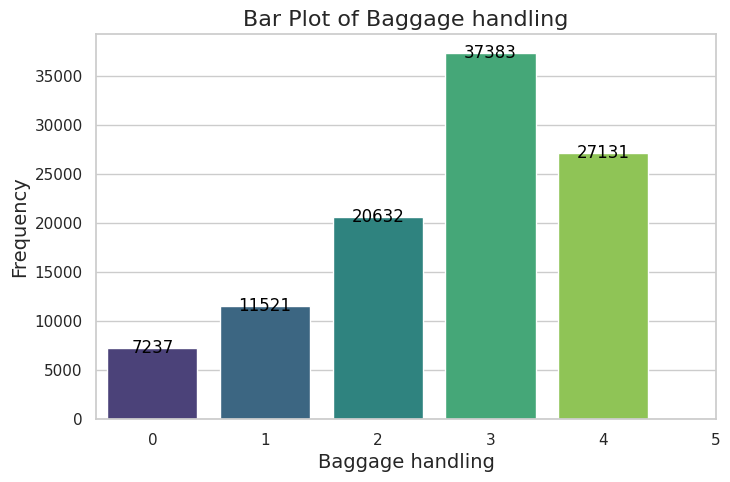

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


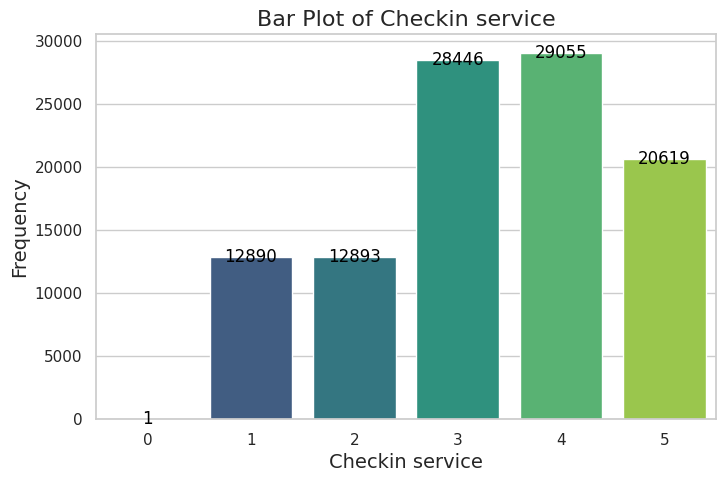

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


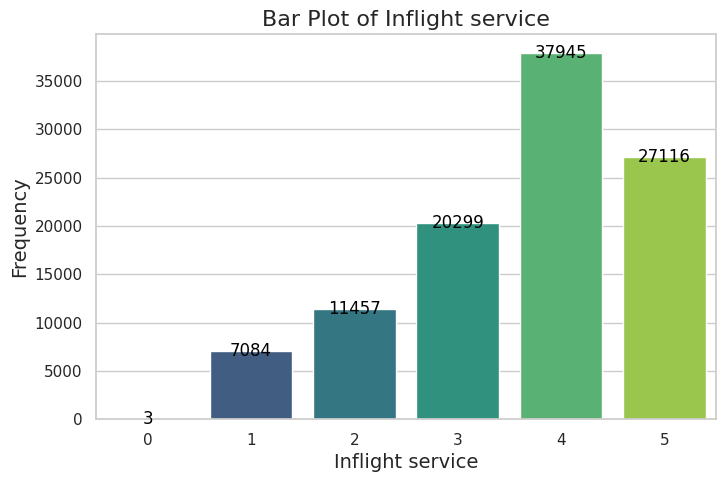

/tmp/ipykernel_9490/2523598669.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")


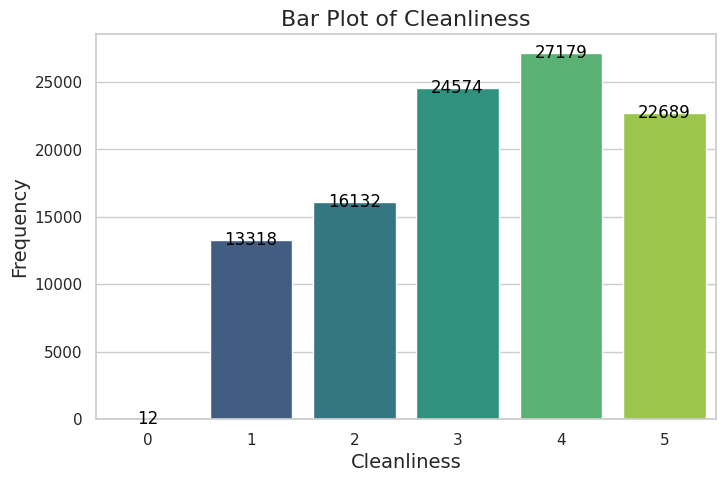

In [12]:
# Univariate analysis for excluded columns: Bar plots with frequencies annotated
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to create bar plots for
cols_0_5 = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Create bar plots for each excluded column
for col in cols_0_5:
    plt.figure(figsize=(8, 5))
    
    # Create a countplot (histogram-like bar plot)
    ax = sns.countplot(data=df, x=col, palette="viridis")
    
    # Annotate frequencies on each bar
    for patch in ax.patches:
        height = patch.get_height()
        if not pd.isna(height):  # Avoid issues with missing data
            ax.text(
                x=patch.get_x() + patch.get_width() / 2, 
                y=height + 0.5,  # Position slightly above the bar
                s=f'{int(height)}',  # Frequency value as text
                ha='center', va='center', fontsize=12, color='black'
            )
    
    # Set titles and labels
    plt.title(f'Bar Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Set xticks to range from 0 to 6
    plt.xticks(ticks=range(6), labels=range(6))  # Adjust x-axis ticks for 0-5
    
    plt.show()


In [13]:
# Count the unique number of id values
unique_id_count = df['id'].nunique()

print(f'The number of unique IDs is: {unique_id_count}')


The number of unique IDs is: 103904


In [14]:
import pandas as pd

# List of columns to summarize
cols_0_5 = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Generate summary statistics
summary_table = df[cols_0_5].agg(['min', 'max', 'mean']).transpose()

# Rename columns for better clarity
summary_table.columns = ['Minimum', 'Maximum', 'Average']

# Display the summary table
print(summary_table)

                                   Minimum  Maximum   Average
Inflight wifi service                  0.0      5.0  2.729683
Departure/Arrival time convenient      0.0      5.0  3.060296
Ease of Online booking                 0.0      5.0  2.756901
Gate location                          0.0      5.0  2.976883
Food and drink                         0.0      5.0  3.202129
Online boarding                        0.0      5.0  3.250375
Seat comfort                           0.0      5.0  3.439396
Inflight entertainment                 0.0      5.0  3.358158
On-board service                       0.0      5.0  3.382363
Leg room service                       0.0      5.0  3.351055
Baggage handling                       1.0      5.0  3.631833
Checkin service                        0.0      5.0  3.304290
Inflight service                       0.0      5.0  3.640428
Cleanliness                            0.0      5.0  3.286351


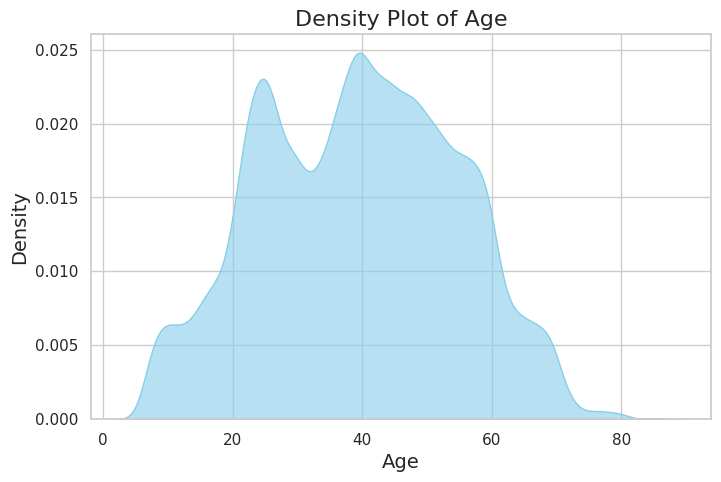

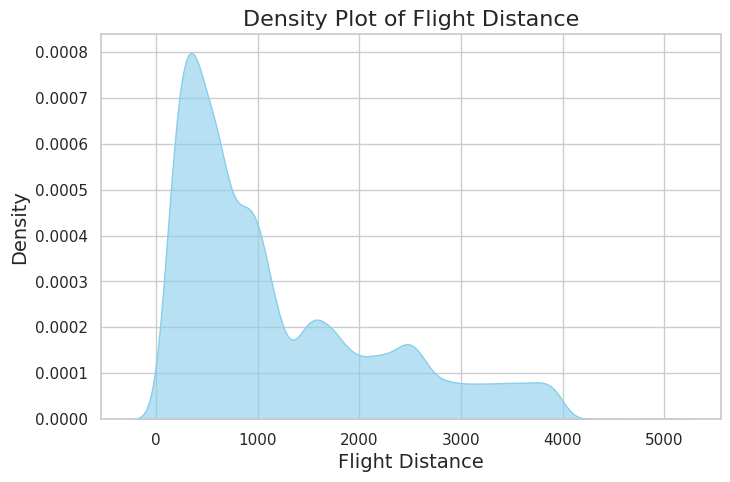

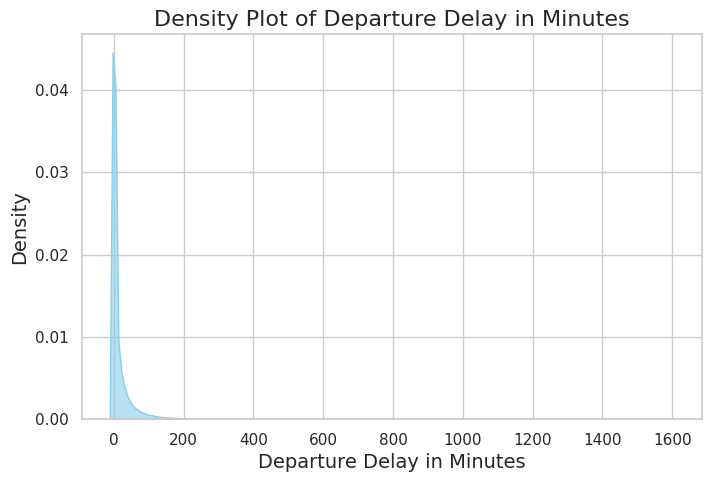

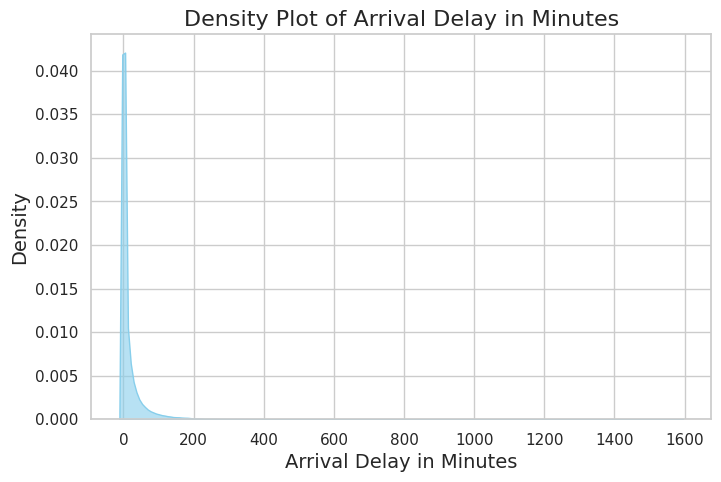

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to omit
cols_0_5 = [
    "id",
    "Unnamed: 0",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Select numerical columns, excluding the ones in cols_0_5
numerical_columns = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns 
    if col not in cols_0_5
]

# Set plot style
sns.set(style="whitegrid")

# Create density plots for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue', alpha=0.6)  # Removed 'shade=True'
    
    # Customize plot
    plt.title(f'Density Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()


## Data Cleaning
1)  Delete rows with missing values in Arrival Delay in Minutes column
2)  Impute mean where 0_5 cols have value 0
3)  Omitting outlier values 
4)  Omitting columns not needed for modeling

In [ ]:
# 1 Delete rows with missing values in Arrival Delay in Minutes column
# This approach is chosen, as this leads only to a drop in 0.3% of the rows, which is acceptable. 
# If a significant proportion of the data was lost with this approach, it would distort the data and possibly impact model performance.

df_cleaned_1 = df.dropna(subset=['Arrival Delay in Minutes'])
# Calculate the number of rows before and after the cleaning
original_row_count = len(df)
cleaned_row_count = len(df_cleaned_1)

# Calculate the number of rows dropped
dropped_row_count = original_row_count - cleaned_row_count

# Calculate the percentage of dropped rows
dropped_percentage = (dropped_row_count / original_row_count) * 100

# Print the result
print(f"Percentage of rows dropped: {dropped_percentage:.2f}%")

Percentage of rows dropped: 0.30%


In [27]:
# 2. Impute mean where 0_5 cols have value 0

# This approach has been chosen, as in Kaggle discussions about this dataset it is mentioned that 0 values for the
# columns which represent ratings of 1-5 (5 being the best) are likely to signify a missing value.
# I could not find further information on this, so I assume this information from Kaggle discussions is True. 

# List of columns to process
columns_to_process = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling", "Checkin service", 
    "Inflight service", "Cleanliness"
]

# Create a copy of df_cleaned_1 to avoid modifying the original DataFrame
df_cleaned_2 = df_cleaned_1.copy()

# Convert the selected columns to float
df_cleaned_2[columns_to_process] = df_cleaned_2[columns_to_process].astype(float)

# Calculate the mean for each column and round it to 2 decimal places
means = df_cleaned_2[columns_to_process].mean().round(2)

# Impute 0's with the rounded mean of the respective column
for column in columns_to_process:
    df_cleaned_2[column] = df_cleaned_2[column].replace(0, means[column])
    


# Check whether the means are imputed correctly:
# Filter rows where 'Inflight wifi service' is 2.73 (which is the mean for this column)
filtered_rows = df_cleaned_2[df_cleaned_2["Inflight wifi service"] == 2.73]

# Display the filtered rows
filtered_rows = filtered_rows[["id", "Inflight wifi service"]]
filtered_rows
# This output just serves to see that the mean rounded to two decimals was imputed correctly, where previously the value was 0. 


,id,Inflight wifi service
42,14849,2.73
56,78972,2.73
90,76392,2.73
148,73604,2.73
162,104623,2.73
...,...,...
103633,99728,2.73
103651,108633,2.73
103683,17529,2.73
103728,15861,2.73


## Preprocessing
* Min Max Scaling (for later use of distance-based algos)
* One-hot encoding 


## Feature importance
* To select features to use in the modeling step

## Modeling